In [2]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [3]:
dt = pd.read_csv('./data/Flipkart/flipkart_com-ecommerce_sample_1050.csv')
dt.product_category_tree[1]

'["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]'

## Prepare categories and sub-categories

In [4]:
dt = dt.loc[:,['product_name', 'description', 'product_category_tree', 'image']]
dt['primary_cat'] = dt['product_category_tree'].apply(lambda x : x.replace('[', '').replace(']', '').replace('\"','').split(" >> ")[0])
dt['secondary_cat'] = dt['product_category_tree'].apply(lambda x : ' >> '.join(x.replace('[', '').replace(']', '').replace('\"','').split(" >> ")[:2]))
dt.drop('product_category_tree', axis = 1, inplace = True)
dt

,product_name,description,image,primary_cat,secondary_cat
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,Home Furnishing >> Curtains & Accessories
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,Baby Care >> Baby Bath & Skin
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,Baby Care >> Baby Bath & Skin
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,Home Furnishing >> Bed Linen
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,Home Furnishing >> Bed Linen
...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care,Baby Care >> Baby & Kids Gifts
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care,Baby Care >> Baby & Kids Gifts
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,5912e037d12774bb73a2048f35a00009.jpg,Baby Care,Baby Care >> Baby & Kids Gifts
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care,Baby Care >> Baby & Kids Gifts


In [4]:
dt.description[150]

'Printland PMR1336 Ceramic Mug (350 g)\r\n                         Price: Rs. 299\r\n\t\t\t\t\r\n\t\t\tPrintland coffee mug is an adorable and a fantastic coffee mug. One can enjoy their morning coffee/tea in this huge mug. It is made of ceramic material. It is a perfect add on to your kitchen wardrobe. It looks very stylish & elegant to serve tea/coffee in this mug during a casual get together at home. It is also a perfect gift to be presented to your loved one.\r\nPrintland coffee mug is an adorable and a fantastic coffee mug. One can enjoy their morning coffee/tea in this huge mug. It is made of ceramic material. It is a perfect add on to your kitchen wardrobe. It looks very stylish & elegant to serve tea/coffee in this mug during a casual get together at home. It is also a perfect gift to be presented to your loved one.'

## Preprocess text data

In [5]:
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer


# Remove numeric characters & transform to lower case
def to_lower_case_and_alpha(s):
    return s.lower()
    # return re.sub("[0-9]+", ' ', s).lower()

# Remove stops words 
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']
def del_stops_words(s):
    return [w for w in s if (not w in stop_w) and len(w) > 2]

# Lemmatize

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

wnl = WordNetLemmatizer()
def lemmatize_fct(s):
    return [wnl.lemmatize(w) for w in s]
    return [wnl.lemmatize(w, get_wordnet_pos(w)) for w in s]

In [6]:
dt['description_preprocessed'] = dt['description'].apply(lambda x : to_lower_case_and_alpha(x)).apply(lambda x : word_tokenize(x))
dt['description_preprocessed_woStops'] = dt['description_preprocessed'].apply(lambda x : del_stops_words(x))
dt['description_lemmatized'] = dt['description_preprocessed_woStops'].apply(lambda x : ' '.join(lemmatize_fct(x)))

dt['description_preprocessed_dl'] = dt['description'].apply(lambda x : to_lower_case_and_alpha(x))


In [7]:
dt['description'][650]

'Buy HomeeHub Polyester Multicolor Self Design Eyelet Window Curtain at Rs. 599 at Flipkart.com. Only Genuine Products. Free Shipping. Cash On Delivery!'

In [8]:
dt['description_preprocessed_dl'][150]

'printland pmr1336 ceramic mug (350 g)\r\n                         price: rs. 299\r\n\t\t\t\t\r\n\t\t\tprintland coffee mug is an adorable and a fantastic coffee mug. one can enjoy their morning coffee/tea in this huge mug. it is made of ceramic material. it is a perfect add on to your kitchen wardrobe. it looks very stylish & elegant to serve tea/coffee in this mug during a casual get together at home. it is also a perfect gift to be presented to your loved one.\r\nprintland coffee mug is an adorable and a fantastic coffee mug. one can enjoy their morning coffee/tea in this huge mug. it is made of ceramic material. it is a perfect add on to your kitchen wardrobe. it looks very stylish & elegant to serve tea/coffee in this mug during a casual get together at home. it is also a perfect gift to be presented to your loved one.'

### Counts & tf-idf

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Remove words with overall frequency above 95%, or that appear only in one document
cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'description_lemmatized'
cv_fit = cvect.fit(dt[feat])
ctf_fit = ctf.fit(dt[feat])

cv_transform = cvect.transform(dt[feat]).toarray()
ctf_transform = ctf.transform(dt[feat]).toarray()

In [10]:
# def norm_l2(x):
#     return x / np.sqrt(np.sum(x**2))

# cv_tf = cv_transform.copy()
# cv_tf = np.array(cv_tf, dtype="float32")

# D = cv_tf.shape[0]
# idfs = np.apply_along_axis( lambda x : np.log((D+1)/(np.sum(x>0)+1))+1 , 0, cv_tf )

# for n in range(len(idfs)):
#     cv_tf[:,n] = cv_tf[:,n] * idfs[n] 
    
# cv_tf = np.apply_along_axis( norm_l2, 1, cv_tf )

# cv_tf[:,1500][np.where(cv_tf[:,1500]>0)]

In [11]:
# print(cv_transform[:,1500][np.where(cv_transform[:,1500]>0)])
# ctv_transform[:,1500][np.where(ctf_transform[:,1500]>0)]

### Word2Vec / Glove / FastText

In [12]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

In [13]:
# W2V model creation

sentences = dt['description_lemmatized'].to_list()
# Do the same as word_tokenize()... actually could have been used before because it also lower, tokenize, desaccent but do not remove stopwords
sentences = [gensim.utils.simple_preprocess(text) for text in sentences] 

print("Max seq. length : {}".format(max([len(x) for x in sentences])))
maxlen = 356 # adapt to length of sentences

Max seq. length : 356


In [14]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences) # convert tokens to integer
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences), # Add zeros at end of sequences to all have the same length
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words) # Un en plus pour le zéro (voir plus bas)

word_index = tokenizer.word_index
vocab_size = len(word_index) + 1


Fit Tokenizer ...
Number of unique words: 4694


In [15]:
# Word2Vec from scratch 

emb_models = {}
emb_models_vectors = {}

w2v_size=300 # Latente vector size
w2v_window=5 # Windows around target word
w2v_min_count=1 # Minimal word count (overall docs) to be accounted for 
w2v_epochs=100 # 

# from scratch W2V CBOW

print("Build & train Word2Vec CBOW model from scratch...")
# Default sg = 0 (CBOW) model, otherwise, use sg = 1 (skip-gram)
emb_models['w2v_cbow_scratch'] = gensim.models.Word2Vec(min_count=w2v_min_count, 
                                   window=w2v_window,
                                   vector_size=w2v_size,
                                   seed=42, sg = 0,
                                   workers=9)
# Build vocab dict.
emb_models['w2v_cbow_scratch'].build_vocab(sentences)
# Train network
emb_models['w2v_cbow_scratch'].train(sentences, total_examples=emb_models['w2v_cbow_scratch'].corpus_count, epochs=w2v_epochs)
emb_models_vectors['w2v_cbow_scratch'] = emb_models['w2v_cbow_scratch'].wv
# w2v_words = emb_models_vectors['w2v_cbow_scratch'].index_to_key
print("Vocabulary size: %i" % len(emb_models_vectors['w2v_cbow_scratch'].index_to_key))


# from scratch W2V SkipGram

print("Build & train Word2Vec Skip-Gram model from scratch...")
# Default sg = 0 (CBOW) model, otherwise, use sg = 1 (skip-gram)
emb_models['w2v_sg_scratch'] = gensim.models.Word2Vec(min_count=w2v_min_count, 
                                   window=w2v_window,
                                   vector_size=w2v_size,
                                   seed=42, sg = 1,
                                   workers=9)
# Build vocab dict.
emb_models['w2v_sg_scratch'].build_vocab(sentences)
# Train network
emb_models['w2v_sg_scratch'].train(sentences, total_examples=emb_models['w2v_sg_scratch'].corpus_count, epochs=w2v_epochs)
emb_models_vectors['w2v_sg_scratch'] = emb_models['w2v_sg_scratch'].wv
# w2v_words = emb_models_vectors['w2v_cbow_scratch'].index_to_key
print("Vocabulary size: %i" % len(emb_models_vectors['w2v_sg_scratch'].index_to_key))

Build & train Word2Vec CBOW model from scratch...
Vocabulary size: 4693
Build & train Word2Vec Skip-Gram model from scratch...
Vocabulary size: 4693


In [16]:
# From Google pretrained weights
print("Load W2V vectors from pretrained model (google news dataset)...")
emb_models_vectors['w2v_pretrained_gg'] = gensim.models.KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin', binary=True)

print("Load Glove vectors from pretrained model... - trained on Wiki2014+GigaWord5")
# Trained from Wiki2014+GigaWord5
emb_models_vectors['glove_pretrained'] = gensim.models.KeyedVectors.load_word2vec_format('./data/glove.6B.300d.txt', binary=False, no_header=True)

print("FastText vectors from pretrained model... - trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news datase")
# Trained from Wiki2014+GigaWord5
emb_models_vectors['fasttext_pretrained'] = gensim.models.KeyedVectors.load_word2vec_format('./data/wiki-news-300d-1M.vec')


Load W2V vectors from pretrained model (google news dataset)...
Load Glove vectors from pretrained model... - trained on Wiki2014+GigaWord5
FastText vectors from pretrained model... - trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news datase


In [17]:
# Création de la matrice d'embedding

def build_embedding(word_index, w2v_words, w2v_vectors):
    # word_index = tokenizer.word_index
    vocab_size = len(word_index) + 1 # Ok. Le +1 permet de pas faire de dépassement, mais du coup, une ligne vide dans la matrice d'embedding !
    embedding_matrix = np.zeros((vocab_size, w2v_size))
    i=0
    j=0

    for word, idx in word_index.items():
        i +=1
        if word in w2v_words:
            j +=1
            embedding_vector = w2v_vectors[word]
            if embedding_vector is not None:
                embedding_matrix[idx] = w2v_vectors[word]

    word_rate = np.round(j/i,4)
    print("Word embedding rate : ", word_rate)
    print("Embedding matrix: %s" % str(embedding_matrix.shape))
    return embedding_matrix

# Création du modèle de prediction
def predict_model(x_sentences, maxlen, vocab_size, w2v_size, embedding_matrix, print_summary = True):
    
    input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
    word_input=Input(shape=(maxlen,),dtype='float64')  
    word_embedding=Embedding(input_dim=vocab_size,
                             output_dim=w2v_size,
                             weights = [embedding_matrix],
                             input_length=maxlen)(word_input)
    word_vec=GlobalAveragePooling1D()(word_embedding)  
    embed_model = Model([word_input],word_vec)

    if print_summary:
        print(embed_model.summary())

    return embed_model.predict(x_sentences)

In [18]:
embedding_matrices = {}
embeddings = {}

for k, vectors in emb_models_vectors.items():
    print("Create Embedding matrix for model '{}' ...".format(k))
    embedding_matrices[k] = build_embedding(word_index, vectors.index_to_key, vectors)
    embeddings[k] = predict_model(x_sentences, maxlen, vocab_size, w2v_size, embedding_matrices[k], print_summary = False)
    
del emb_models_vectors
del embedding_matrices

Create Embedding matrix for model 'w2v_cbow_scratch' ...
Word embedding rate :  1.0
Embedding matrix: (4694, 300)
33/33 [==============================] - 0s 750us/step
Create Embedding matrix for model 'w2v_sg_scratch' ...
Word embedding rate :  1.0
Embedding matrix: (4694, 300)
33/33 [==============================] - 0s 781us/step
Create Embedding matrix for model 'w2v_pretrained_gg' ...
Word embedding rate :  0.84
Embedding matrix: (4694, 300)
33/33 [==============================] - 0s 3ms/step
Create Embedding matrix for model 'glove_pretrained' ...
Word embedding rate :  0.8698
Embedding matrix: (4694, 300)
33/33 [==============================] - 0s 3ms/step
Create Embedding matrix for model 'fasttext_pretrained' ...
Word embedding rate :  0.8574
Embedding matrix: (4694, 300)
33/33 [==============================] - 0s 3ms/step


In [19]:
# # Same stuff by hand (bit longer to run of course ^^)

# embeddings_W2V_hand = np.zeros((len(x_sentences), w2v_size))
# for s in range(len(x_sentences)):
#     oh = np.zeros((vocab_size, len(x_sentences[0]))) # Create kind of one-hot encoding
#     for k, i in enumerate(x_sentences[s]):
#         oh[i, k] = 1
#     embeddings_W2V_hand[s] = np.apply_along_axis(np.mean, 0, np.dot(np.transpose(oh), embedding_matrix)) # Multiply by embedding weights & compute mean

# np.mean(embeddings_W2V_hand - embeddings_W2V) # Alright, that's approx. the same 

### BERT

A LIRE : https://ledatascientist.com/a-la-decouverte-de-bert/

In [20]:
# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")



2.9.1
2.9.1
Num GPUs Available:  1
True
GPU found


In [21]:
import time

# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
## Added param : model_cls : keep only CLS representation instead of the mean of all subwords
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF', mode_cls = False) :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    if mode_cls : 
        features_bert = np.array(last_hidden_states_tot)[:,0,:]
    else:
        features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

#### BERT - Hugging face
##### 'bert-base-uncased'

See https://huggingface.co/bert-base-uncased

See https://trishalaneeraj.github.io/2020-04-04/feature-based-approach-with-bert ; pretty interesting

In [22]:
max_length = 356 # Should be 356 ?
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)

sentences_dl = dt['description_preprocessed_dl'].to_list()

# Création des features
features_bert_bbu, last_hidden_states_tot_bbu = feature_BERT_fct(model, model_type, sentences_dl, 
                                                             max_length, batch_size, mode='HF')

features_bert_bbu_cls, last_hidden_states_tot_bbu_cls = feature_BERT_fct(model, model_type, sentences_dl, 
                                                             max_length, batch_size, mode='HF', mode_cls=True)

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\max/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.20.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file https://huggingface.co/bert-base-unc

1/1 [==============================] - 0s 20ms/step
temps traitement :  39.0


loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\max/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.20.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased/res

1/1 [==============================] - 0s 24ms/step
temps traitement :  36.0


#####   'cardiffnlp/twitter-roberta-base-sentiment'

See https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment

In [23]:
model_type = 'cardiffnlp/twitter-roberta-base-sentiment'
model = TFAutoModel.from_pretrained(model_type)

features_bert_trbs, last_hidden_states_tot_trbs = feature_BERT_fct(model, model_type, sentences_dl, 
                                                         max_length, batch_size, mode='HF')

loading configuration file https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/config.json from cache at C:\Users\max/.cache\huggingface\transformers\7dd97280b5338fb674b5372829a05a1aaaa76f9f2fa71c36199f2ce1ee1104a0.4c7ca95b4fd82b8bbe94fde253f5f82e5a4eedefe6f86f6fa79efc903d6cfe60
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attenti

1/1 [==============================] - 0s 22ms/step
temps traitement :  40.0


#### BERT - Hub TensorFlow

In [24]:
import tensorflow_hub as hub
import tensorflow_text 

model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

# If error : SavedModel file does not exist .... ; remove indicated folder

In [25]:
model_type = 'bert-base-uncased'
model = bert_layer

features_bert_hubtf_bbu, last_hidden_states_tot_hubtf_bbu = feature_BERT_fct(model, model_type, sentences_dl, 
                                                                             max_length, batch_size, mode='TFhub')

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\max/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.20.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased/res

temps traitement :  36.0


### USE - Universal Sentence Encoder

https://amitness.com/2020/06/universal-sentence-encoder/

In [26]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [27]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [28]:
with tf.device('/CPU:0'): # Doesn"t work on GPU (why  ? JIT compilation failed ?)
    features_USE = feature_USE_fct(sentences_dl, batch_size)

## Dimensions reduction


In [8]:
# Concatenate datasets
methods_ = {}
    
methods_ = {  'cv_transform' : cv_transform,
              'ctf_transform' : ctf_transform}

for k, em in embeddings.items():
    methods_[k] = em
    
methods_['bert-base-uncased'] = features_bert_bbu
methods_['bert-base-uncased_cls'] = features_bert_bbu_cls

methods_['twitter-roberta-base-sentiment'] = features_bert_trbs
methods_['bert-hubtf-bbu'] = features_bert_hubtf_bbu

methods_['use'] = features_USE


### PCA projections

Explained (cum.) intertia for model 'cv_transform' : [0.06332793 0.12044035 0.16934438 0.19723171 0.22090753]
Explained (cum.) intertia for model 'ctf_transform' : [0.03459876 0.05904859 0.07793782 0.09293395 0.10729378]


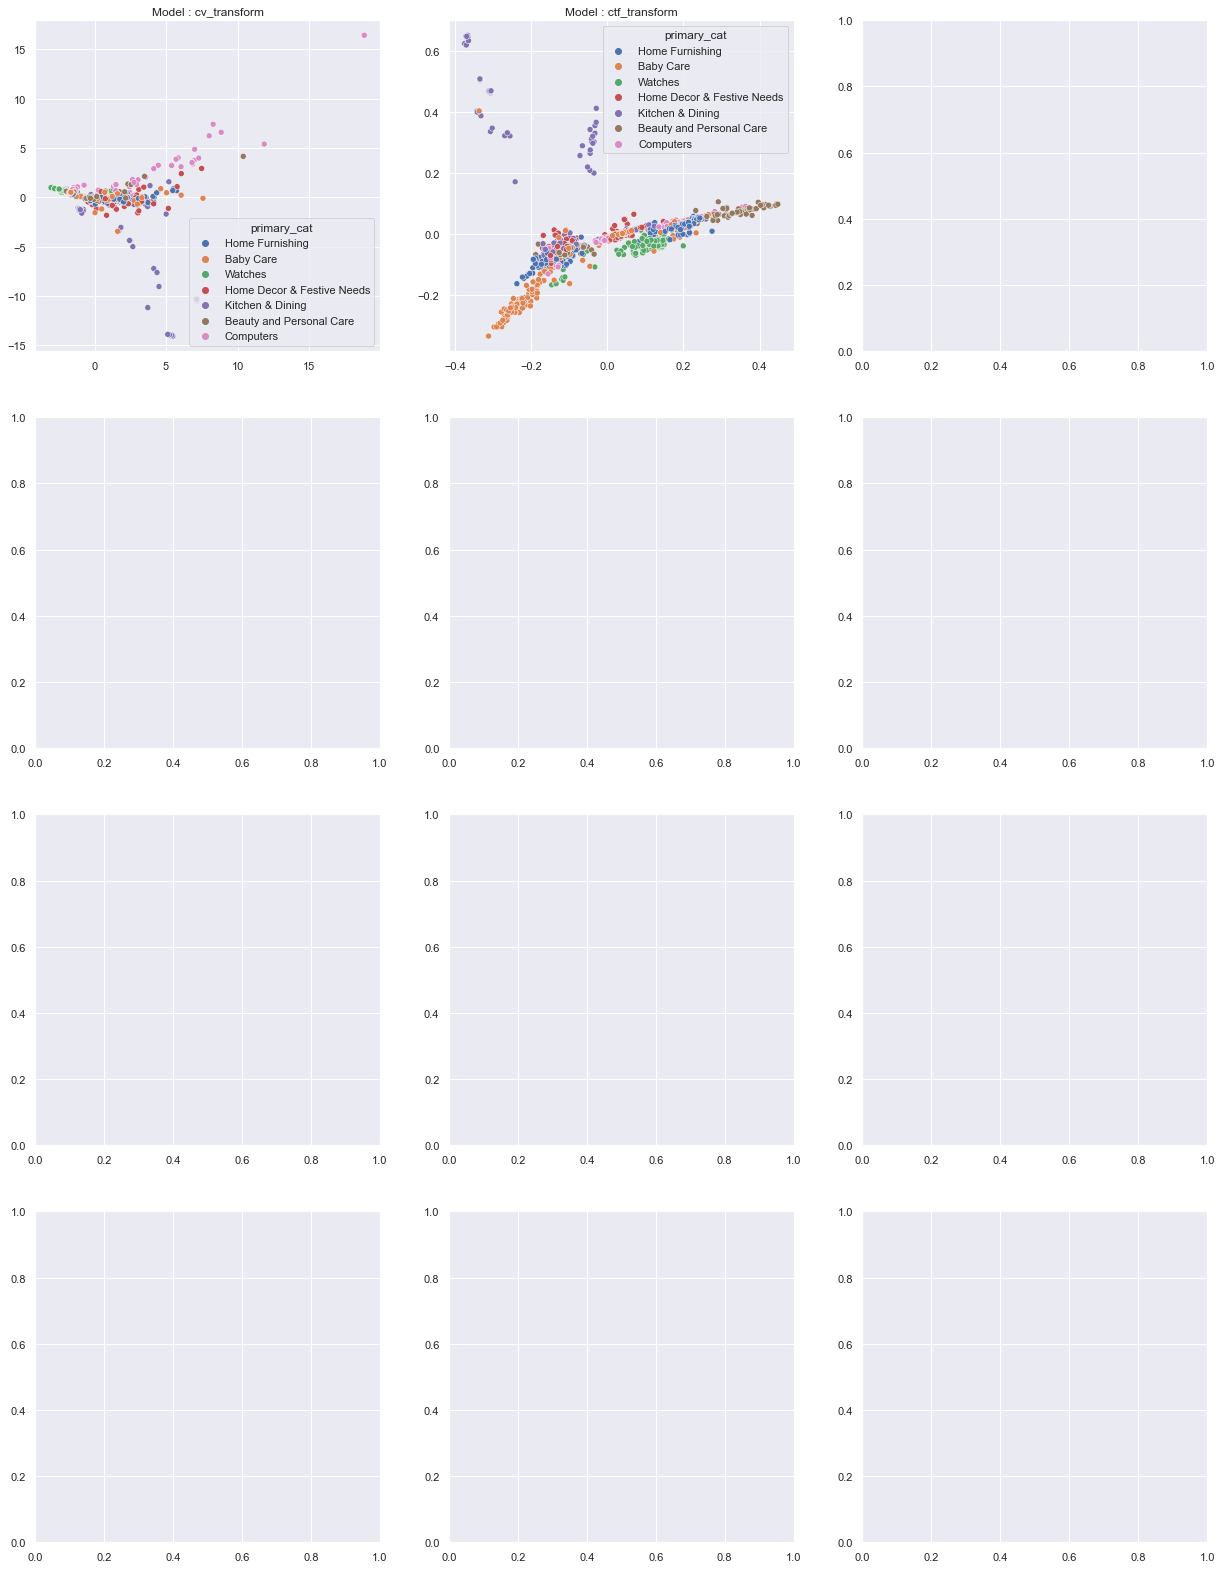

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()
# cv_transform_ss = ss.fit_transform(cv_transform)

pca_ = {}

# Fitting
for model, emb in methods_.items():
    pca = PCA().fit(emb)
    print("Explained (cum.) intertia for model '{}' : {}".format(model, np.cumsum(pca.explained_variance_ratio_)[:5]))
    pca_[model] = pca.transform(emb)

    
# Plotting
n_row = 4
n_col = 3

sns.set(rc = {'figure.figsize':(n_col * 7, n_row * 7)}, font_scale = 1)
fig, ax = plt.subplots(n_row, n_col)

i = 0
for model, proj in pca_.items():
    sns.scatterplot(x=proj[:,0], y=proj[:,1], hue = dt['primary_cat'], ax = ax[ i // n_col, i % n_col ]).set(title = "Model : {}".format(model))
    i+=1


### T-SNE projections

In [10]:
from sklearn import manifold
import warnings
warnings.filterwarnings('ignore')

tsne_ = {}

perplex_ = [5, 10, 20, 30, 50, 75]

for model, emb in methods_.items():
    tsne_[model] = []
    for p in perplex_:
        tsne = manifold.TSNE(n_components=2, perplexity=p, init='pca')
        tsne_[model].append(tsne.fit_transform(emb))

warnings.filterwarnings('default')

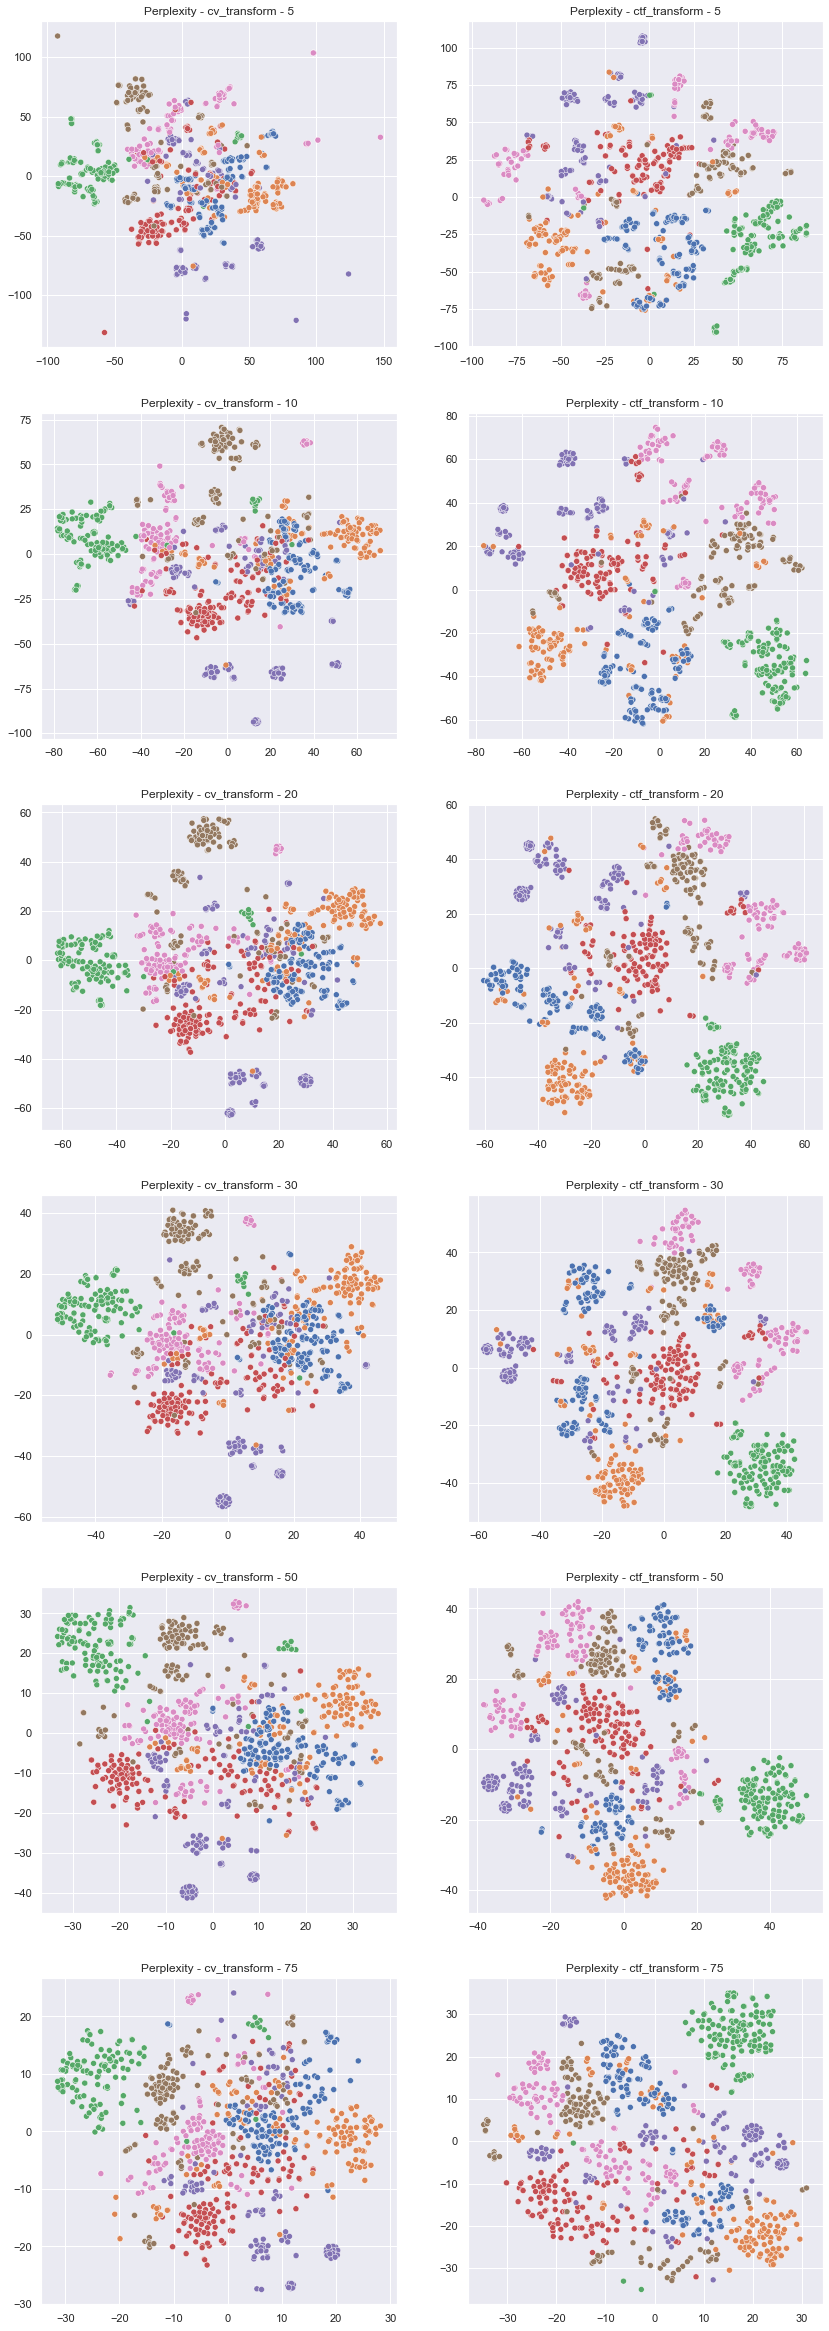

In [11]:
# Plotting
n_row = len(perplex_)
n_col = len(tsne_)

sns.set(rc = {'figure.figsize':(n_col * 7, n_row * 7)}, font_scale = 1)
fig, ax = plt.subplots(n_row, n_col)

i = 0
for model, proj in tsne_.items():
    for p in range(len(perplex_)):
        sns.scatterplot(x=proj[p][:,0], y=proj[p][:,1], hue = dt['primary_cat'], ax = ax[p, i], legend = False).set(title='Perplexity - {} - {}'.format(model, perplex_[p]));
    i+=1


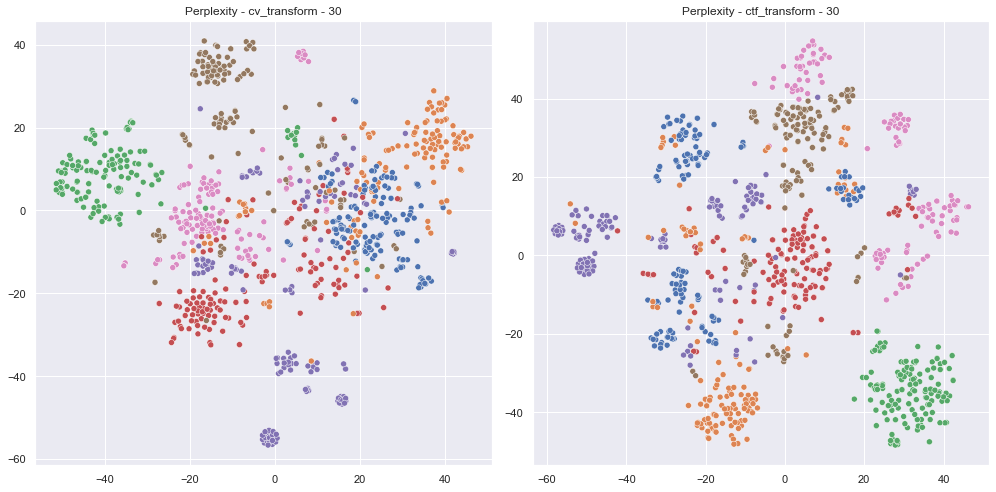

In [13]:
# Presentation purpose
sns.set(rc = {'figure.figsize':(14, 7)}, font_scale = 1)
fig, ax = plt.subplots(1, 2)
p=3

mod = 'cv_transform'
proj = tsne_[mod]
sns.scatterplot(x=proj[p][:,0], y=proj[p][:,1], hue = dt['primary_cat'], legend = False, ax = ax[0]).set(title='Perplexity - {} - {}'.format(mod, perplex_[p]));

mod = 'ctf_transform'
proj = tsne_[mod]
sns.scatterplot(x=proj[p][:,0], y=proj[p][:,1], hue = dt['primary_cat'], legend = False, ax = ax[1]).set(title='Perplexity - {} - {}'.format(mod, perplex_[p]));

plt.tight_layout()

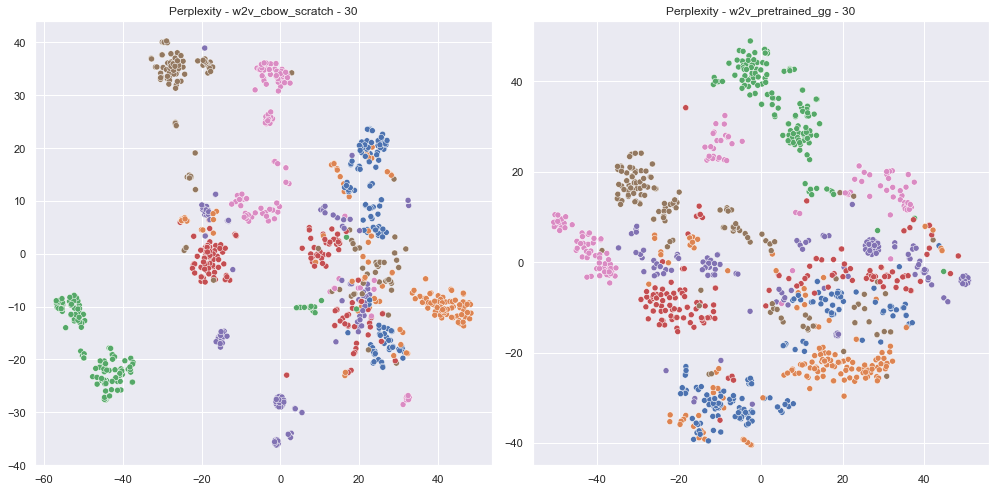

In [58]:
# Presentation purpose

sns.set(rc = {'figure.figsize':(14, 7)}, font_scale = 1)
fig, ax = plt.subplots(1, 2)
p=3

mod = 'w2v_cbow_scratch'
proj = tsne_[mod]
sns.scatterplot(x=proj[p][:,0], y=proj[p][:,1], hue = dt['primary_cat'], legend = False, ax = ax[0]).set(title='Perplexity - {} - {}'.format(mod, perplex_[p]));

mod = 'w2v_pretrained_gg'
proj = tsne_[mod]
sns.scatterplot(x=proj[p][:,0], y=proj[p][:,1], hue = dt['primary_cat'], legend = False, ax = ax[1]).set(title='Perplexity - {} - {}'.format(mod, perplex_[p]));

plt.tight_layout()

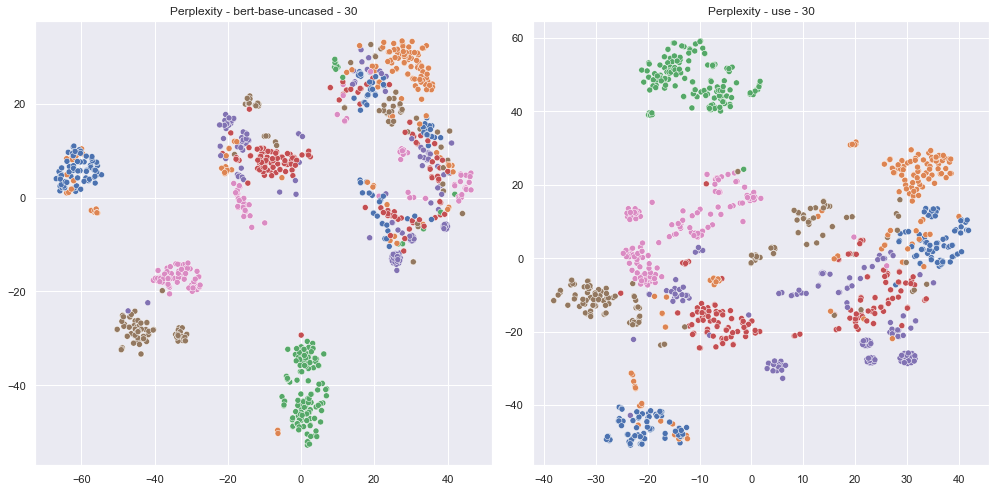

In [59]:
# Presentation purpose
sns.set(rc = {'figure.figsize':(14, 7)}, font_scale = 1)
fig, ax = plt.subplots(1, 2)
p=3

mod = 'bert-base-uncased'
proj = tsne_[mod]
sns.scatterplot(x=proj[p][:,0], y=proj[p][:,1], hue = dt['primary_cat'], legend = False, ax = ax[0]).set(title='Perplexity - {} - {}'.format(mod, perplex_[p]));

mod = 'use'
proj = tsne_[mod]
sns.scatterplot(x=proj[p][:,0], y=proj[p][:,1], hue = dt['primary_cat'], legend = False, ax = ax[1]).set(title='Perplexity - {} - {}'.format(mod, perplex_[p]));

plt.tight_layout()

## Clustering

In [15]:
from sklearn.cluster import KMeans
from sklearn import metrics

### On PCA proj

In [17]:
n_cat_I = len(set(dt['primary_cat']))
n_cat_II = len(set(dt['secondary_cat']))

print("# clusters in Primary categories : {}".format(n_cat_I))
print("# clusters in Secondaty categories : {}".format(n_cat_II))

# Primary cats
warnings.filterwarnings('ignore')

aris_pcat_ = {}
aris_scat_ = {}

n_ax = 8

for model, proj in pca_.items():
    aris_pcat_[model] = []
    aris_scat_[model] = []
    
    for i in range(2, n_ax+1):
        km = KMeans(n_clusters = n_cat_I, init = 'k-means++')
        aris_pcat_[model].append( metrics.adjusted_rand_score(km.fit_predict(proj[:,:i]), dt['primary_cat']) )
        
        km = KMeans(n_clusters = n_cat_II, init = 'k-means++')
        aris_scat_[model].append( metrics.adjusted_rand_score(km.fit_predict(proj[:,:i]), dt['secondary_cat']) )
    
warnings.filterwarnings('default')

# clusters in Primary categories : 7
# clusters in Secondaty categories : 62


In [62]:
tp_I = pd.DataFrame({'model' : np.repeat(list(aris_pcat_.keys()), n_ax-1),
                      'n_axis' : list(range(2, n_ax+1)) * len(aris_pcat_),
                      'ari' : np.concatenate(list(aris_pcat_.values()))})

tp_II = pd.DataFrame({'model' : np.repeat(list(aris_scat_.keys()), n_ax-1),
                      'n_axis' : list(range(2, n_ax+1)) * len(aris_scat_),
                      'ari' : np.concatenate(list(aris_scat_.values()))})

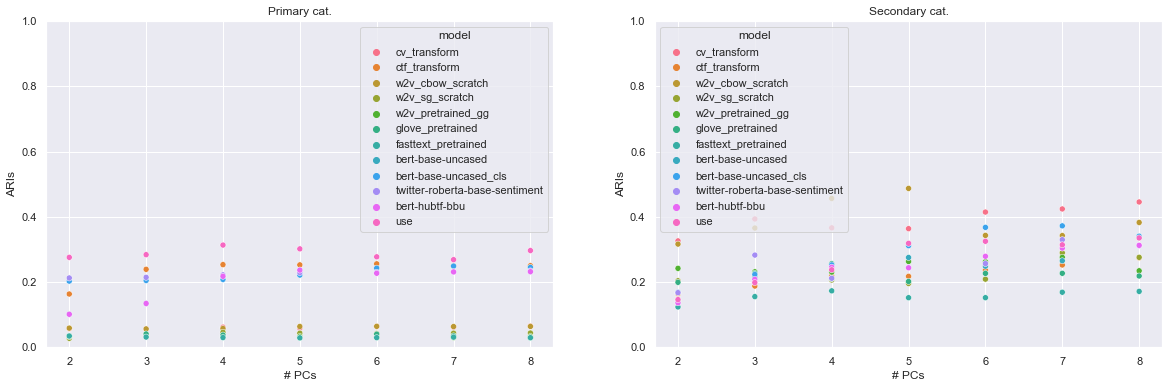

In [63]:
sns.set(rc = {'figure.figsize':(20,6)}, font_scale = 1)
fig, ax = plt.subplots(1, 2)

sns.scatterplot(x = 'n_axis', y = 'ari', hue = 'model', data = tp_I, ax = ax[0]).set(ylim=(0, 1), title = 'Primary cat.', xlabel = '# PCs', ylabel = 'ARIs');
sns.scatterplot(x = 'n_axis', y = 'ari', hue = 'model', data = tp_II, ax = ax[1]).set(ylim=(0, 1), title = 'Secondary cat.', xlabel = '# PCs', ylabel = 'ARIs');


### On T-SNE projs

In [18]:
# Primary cats
warnings.filterwarnings('ignore')

aris_pcat_ = {}
aris_scat_ = {}


for model, proj in tsne_.items():
    aris_pcat_[model] = []
    aris_scat_[model] = []
    
    for i in range(len(perplex_)):
        km = KMeans(n_clusters = n_cat_I, init = 'k-means++')
        aris_pcat_[model].append( metrics.adjusted_rand_score( km.fit_predict(proj[i]), dt['primary_cat']) )
        
        km = KMeans(n_clusters = n_cat_II, init = 'k-means++')
        aris_scat_[model].append( metrics.adjusted_rand_score(km.fit_predict(proj[i]), dt['secondary_cat']) )
        
warnings.filterwarnings('default')

In [19]:
tp_I = pd.DataFrame({'model' : np.repeat(list(aris_pcat_.keys()), len(perplex_)),
                      'perplexity' : perplex_ * len(aris_pcat_),
                      'ari' : np.concatenate(list(aris_pcat_.values()))})

tp_II = pd.DataFrame({'model' : np.repeat(list(aris_scat_.keys()), len(perplex_)),
                      'perplexity' : perplex_ * len(aris_scat_),
                      'ari' : np.concatenate(list(aris_scat_.values()))})

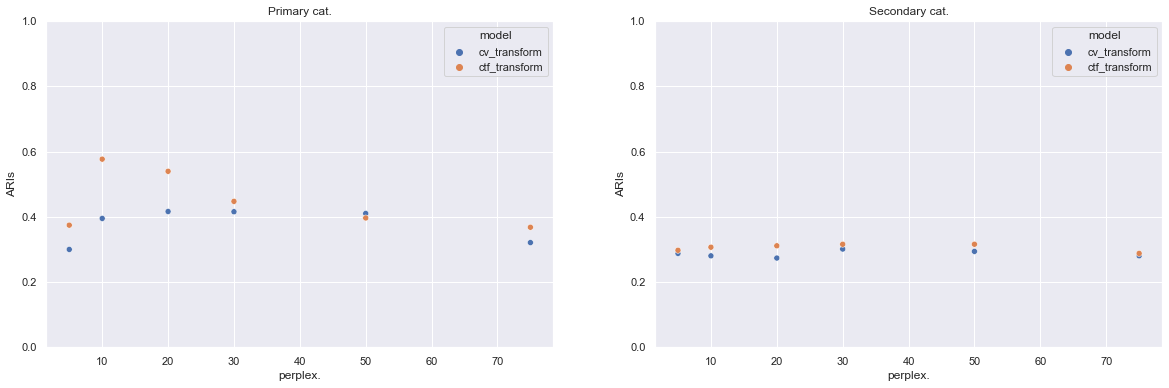

In [20]:
sns.set(rc = {'figure.figsize':(20,6)}, font_scale = 1)
fig, ax = plt.subplots(1, 2)

sns.scatterplot(x = 'perplexity', y = 'ari', hue = 'model', data = tp_I, ax = ax[0]).set(ylim=(0, 1), title = 'Primary cat.', xlabel = 'perplex.', ylabel = 'ARIs');
sns.scatterplot(x = 'perplexity', y = 'ari', hue = 'model', data = tp_II, ax = ax[1]).set(ylim=(0, 1), title = 'Secondary cat.', xlabel = 'perplex.', ylabel = 'ARIs');


In [ ]:
tp_I[tp_I.perplexity == 30].sort_values('ari')

## Look at confusion

In [21]:
from sklearn.preprocessing import LabelEncoder

encode_labels = LabelEncoder()
plabs = encode_labels.fit_transform(dt['primary_cat'])


proj = tsne_['ctf_transform'][3]

km = KMeans(n_clusters = n_cat_I, init = 'k-means++')
km.fit_predict(proj)
m=metrics.confusion_matrix(plabs, km.fit_predict(proj))     
print(m)
c = np.apply_along_axis(lambda x : np.argmax(x), 1, m)
print(m[:,c])
print(encode_labels.classes_)

C:\Users\max\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\max\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[[ 13   0   8   5   7 100  17]
 [107   0   0  21   9  13   0]
 [ 71   0   0   0  79   0   0]
 [  0   3   6 114  11   6  10]
 [  6   0  26   1  14  39  64]
 [  2   0  83  12   8  11  34]
 [  0 150   0   0   0   0   0]]
[[100  13   7   5  17   8   0]
 [ 13 107   9  21   0   0   0]
 [  0  71  79   0   0   0   0]
 [  6   0  11 114  10   6   3]
 [ 39   6  14   1  64  26   0]
 [ 11   2   8  12  34  83   0]
 [  0   0   0   0   0   0 150]]
['Baby Care' 'Beauty and Personal Care' 'Computers'
 'Home Decor & Festive Needs' 'Home Furnishing' 'Kitchen & Dining'
 'Watches']


In [22]:
dtmp = pd.DataFrame(proj)
dtmp['cat'] = dt['primary_cat']
groups_means = dtmp.groupby('cat').apply(np.mean)
groups_means

,0,1
cat,,
Baby Care,-13.228780,-20.484829
Beauty and Personal Care,3.604098,20.400698
Computers,23.263868,23.137291
Home Decor & Festive Needs,0.049376,-2.119589
Home Furnishing,-19.594954,7.558919
Kitchen & Dining,-29.902077,4.536478
Watches,31.343718,-34.898170


C:\Users\max\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


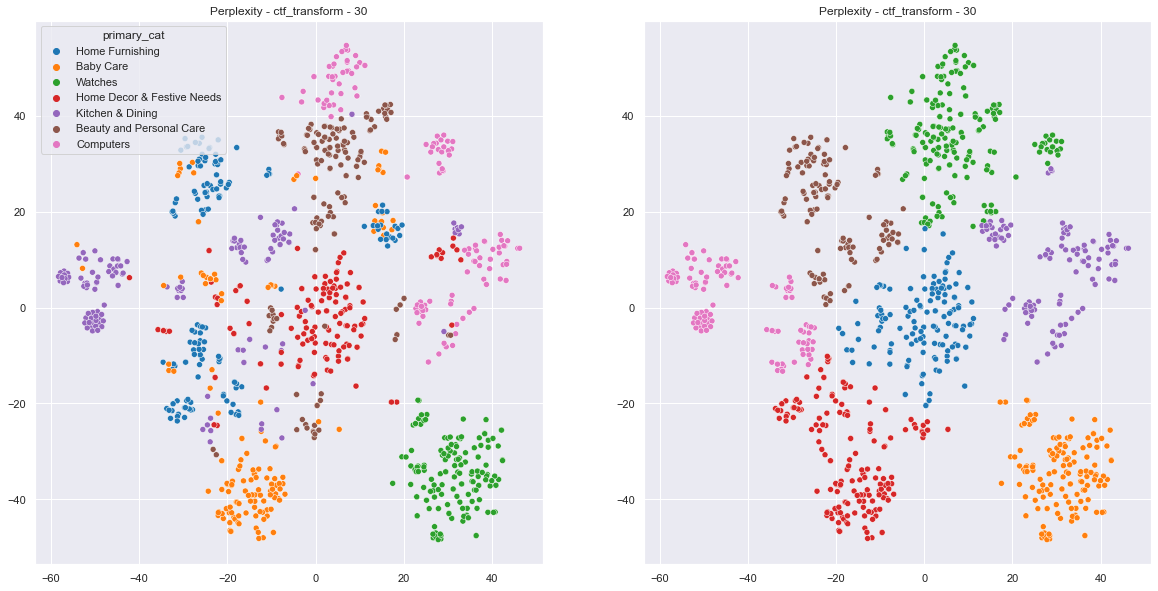

In [23]:
sns.set(rc = {'figure.figsize':(10, 10)}, font_scale = 1)
p=3

mod = 'ctf_transform'
proj_ = tsne_[mod]

sns.set(rc = {'figure.figsize':(20,10)}, font_scale = 1)
fig, ax = plt.subplots(1, 2)

sns.scatterplot(x=proj_[p][:,0], y=proj_[p][:,1], hue = dt['primary_cat'], palette = sns.color_palette("tab10")[:7], ax = ax[0]).set(title='Perplexity - {} - {}'.format(mod, perplex_[p]));
sns.scatterplot(x=proj_[p][:,0], y=proj_[p][:,1], hue = km.fit_predict(proj), palette = sns.color_palette("tab10")[:7], ax = ax[1], legend = False).set(title='Perplexity - {} - {}'.format(mod, perplex_[p]));

In [ ]:
groups_means.index

# On images

## SIFT

https://medium.com/data-breach/introduction-to-sift-scale-invariant-feature-transform-65d7f3a72d40

In [24]:
import cv2

dt_img = dt.loc[:,['primary_cat', 'secondary_cat', 'image']]
dt_img

,primary_cat,secondary_cat,image
0,Home Furnishing,Home Furnishing >> Curtains & Accessories,55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,Baby Care,Baby Care >> Baby Bath & Skin,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Baby Care,Baby Care >> Baby Bath & Skin,64d5d4a258243731dc7bbb1eef49ad74.jpg
3,Home Furnishing,Home Furnishing >> Bed Linen,d4684dcdc759dd9cdf41504698d737d8.jpg
4,Home Furnishing,Home Furnishing >> Bed Linen,6325b6870c54cd47be6ebfbffa620ec7.jpg
...,...,...,...
1045,Baby Care,Baby Care >> Baby & Kids Gifts,958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046,Baby Care,Baby Care >> Baby & Kids Gifts,fd6cbcc22efb6b761bd564c28928483c.jpg
1047,Baby Care,Baby Care >> Baby & Kids Gifts,5912e037d12774bb73a2048f35a00009.jpg
1048,Baby Care,Baby Care >> Baby & Kids Gifts,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg


### Implementation

In [25]:
import time
from sklearn import manifold, cluster, metrics, decomposition
import warnings
import pickle

In [6]:

def read_and_convert_to_greys(paths):
    img = []
    for p in paths: # Convert to greys & equalize histogram
        img.append(cv2.equalizeHist(cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2GRAY)))
    
    return img

def normalized_desc(x):
    x = x / np.sqrt(np.sum(x ** 2)) # Normalized #1  invariance par changement de contraste
    x[np.where(x > 0.2)] = 0.2 # Thresholding        invariance par changement d'exposition
    x = x / np.sqrt(np.sum(x ** 2)) # Normalized #2  invariance par changement d'exposition
    return x

def get_descriptors(imgs, normalized = True, tokeep = 2000):
    sift = cv2.xfeatures2d.SIFT_create()
    des = []
    print("Progress : ", end = '')
    for k, i in enumerate(imgs):
        if k%200==0 : print("{:.2f}% - ".format(100*(k/len(imgs))), end = '')
        train_keypoints, train_descriptor = sift.detectAndCompute(i, None)
        
        if train_descriptor is None:
            des.append( np.empty( (0, 128) ) )
        else:
            subset_train_descriptor = train_descriptor[np.random.choice(train_descriptor.shape[0], min(train_descriptor.shape[0], tokeep), replace = False),:]
            if normalized:
                normalized_descriptors = np.apply_along_axis(normalized_desc , 0, subset_train_descriptor)
                des.append( normalized_descriptors )
            else:
                des.append( subset_train_descriptor )
    print('ok.')
    return des
    
paths = list(dt_img['image'].apply(lambda x : './data/Flipkart/Images/{}'.format(x)))

n_imgs = 1050

ar = read_and_convert_to_greys(paths[:n_imgs])

des_normalized = get_descriptors(ar, True)
des_unnormalized = get_descriptors(ar, False)

with open('./data/descriptors_normalized.pkl', 'wb') as outp:
    pickle.dump(des_normalized, outp, pickle.HIGHEST_PROTOCOL)
    
with open('./data/descriptors_unnormalized.pkl', 'wb') as outp:
    pickle.dump(des_unnormalized, outp, pickle.HIGHEST_PROTOCOL)

Progress : 0.00% - 19.05% - 38.10% - 57.14% - 76.19% - 95.24% - ok.
Progress : 0.00% - 19.05% - 38.10% - 57.14% - 76.19% - 95.24% - ok.


In [7]:
with open('./data/descriptors_normalized.pkl', 'rb') as inp:
    des_normalized = pickle.load(inp)

with open('./data/descriptors_unnormalized.pkl', 'rb') as inp:
    des_unnormalized = pickle.load(inp)

# Filter NaN
Xn=np.concatenate(des_normalized)
Xn_ = Xn[ ~np.apply_along_axis(lambda x : any(np.isnan(x)), 1, Xn) ]

Xun=np.concatenate(des_unnormalized)
Xun_ = Xun[ ~np.apply_along_axis(lambda x : any(np.isnan(x)), 1, Xun) ]

print("Theoretical k : {}".format(int(np.sqrt(Xn_.shape[0]))))


Theoretical k : 1342


In [8]:
# Between 10*#cat et sqrt(# descriptors)
n_visualwords = [70, 250, 500, 750, 1342]

def normalized_hist(x, n_vw):
    c = np.zeros(n_vw)
    for i in x:
        c[i]+=1
    return c / np.sqrt(np.sum(c**2))

def compute_visual_word_hist(descs, model, n_wv):    
    descs_hist = []
    for x in descs:
        if x.shape[0] == 0:
            descs_hist.append(None)
        else:
            x = x[~np.apply_along_axis(lambda v : any(np.isnan(v)), 1, x)]
            if x.shape[0] == 0:
                descs_hist.append(None)
            else:
                descs_hist.append( normalized_hist(model.predict(x), n_wv) )
    return descs_hist
    
    
bof_n = []
bof_un = []

for n_vw in n_visualwords:
    print("# visual words : {}".format(n_vw))
    model = cluster.MiniBatchKMeans(init="k-means++", n_clusters = n_vw, batch_size=3500)
    model.fit(Xn_);
    bof_n.append(compute_visual_word_hist(des_normalized, model, n_vw))
    
    model = cluster.MiniBatchKMeans(init="k-means++", n_clusters = n_vw, batch_size=3500)
    model.fit(Xun_);
    bof_un.append(compute_visual_word_hist(des_unnormalized, model, n_vw))

# visual words : 70
# visual words : 250
# visual words : 500
# visual words : 750
# visual words : 1342


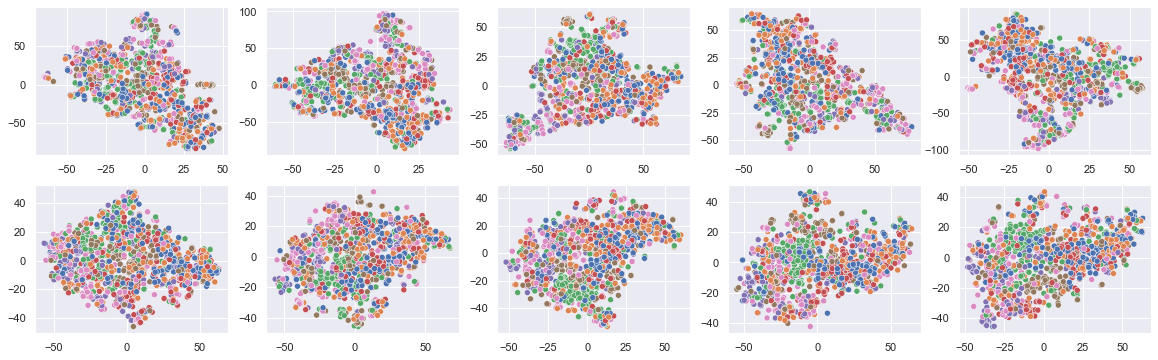

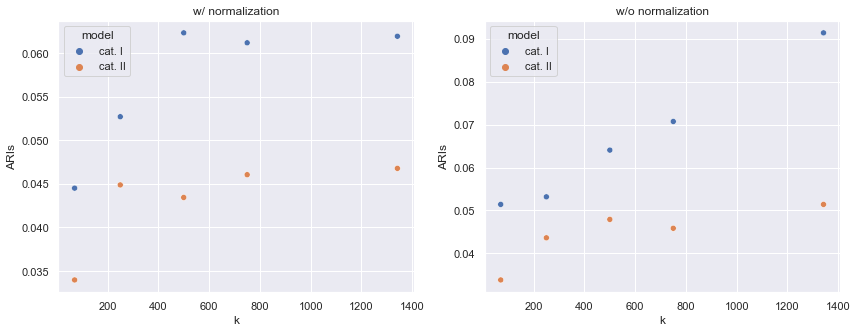

In [10]:
aris_I_n = []
aris_II_n = []
aris_I_un = []
aris_II_un = []

warnings.filterwarnings('ignore')

sns.set(rc = {'figure.figsize':(20,6)}, font_scale = 1)
fig, ax = plt.subplots(2, len(n_visualwords))

for i in range(len(n_visualwords)):

    # isolate problematic ones
    shitty_ones_n = np.array([x is None for x in bof_n[i]])
    shitty_ones_un = np.array([x is None for x in bof_un[i]])
    
    # filter bof array
    tn = [ x for (k, x) in enumerate(bof_n[i])  if not shitty_ones_n[k] ]
    tun = [ x for (k, x) in enumerate(bof_un[i])  if not shitty_ones_un[k] ]

    bof_labels_I_n = dt_img['primary_cat'][:n_imgs][~ shitty_ones_n]
    bof_labels_II_n = dt_img['secondary_cat'][:n_imgs][~ shitty_ones_n]
    bof_array_n = np.stack(tn)
    
    bof_labels_I_un = dt_img['primary_cat'][:n_imgs][~ shitty_ones_un]
    bof_labels_II_un = dt_img['secondary_cat'][:n_imgs][~ shitty_ones_un]
    bof_array_un = np.stack(tun)

    # Dimensions réduction
    # pca = decomposition.PCA(0.98)
    # bof_pca = pca.fit_transform(bof_array_n)
    bof_pca = bof_array_n
    
    tsne_bof = manifold.TSNE(n_components=2, perplexity=10, init='random')
    bof_array_n = tsne_bof.fit_transform(bof_pca)

    sns.scatterplot(bof_array_n[:,0], bof_array_n[:,1], hue = bof_labels_I_n, ax = ax[0, i], legend = False)

    
#     pca = decomposition.PCA(0.98)
#     bof_pca = pca.fit_transform(bof_array_un)
    bof_pca = bof_array_un
    
    tsne_bof = manifold.TSNE(n_components=2, perplexity=20, init='random')
    bof_array_un = tsne_bof.fit_transform(bof_pca)

    sns.scatterplot(bof_array_un[:,0], bof_array_un[:,1], hue = bof_labels_I_un, ax = ax[1, i], legend = False)

    
    n_cat_I = len(set(bof_labels_I_n))
    models_ = cluster.KMeans(init="k-means++", n_clusters = n_cat_I)
    preds_I = models_.fit_predict(bof_array_n)
    aris_I_n.append(metrics.adjusted_rand_score(preds_I, bof_labels_I_n))
    
    n_cat_II = len(set(bof_labels_II_n))
    models_ = cluster.KMeans(init="k-means++", n_clusters = n_cat_II)
    preds_II = models_.fit_predict(bof_array_n)
    aris_II_n.append(metrics.adjusted_rand_score(preds_II, bof_labels_II_n))
    
    
    n_cat_I = len(set(bof_labels_I_un))
    models_ = cluster.KMeans(init="k-means++", n_clusters = n_cat_I)
    preds_I = models_.fit_predict(bof_array_un)
    aris_I_un.append(metrics.adjusted_rand_score(preds_I, bof_labels_I_un))
    
    n_cat_II = len(set(bof_labels_II_un))
    models_ = cluster.KMeans(init="k-means++", n_clusters = n_cat_II)
    preds_II = models_.fit_predict(bof_array_un)
    aris_II_un.append(metrics.adjusted_rand_score(preds_II, bof_labels_II_un))
    

warnings.filterwarnings('default')

tpn = pd.DataFrame({'model' : np.repeat(['cat. I', 'cat. II'], len(n_visualwords)),
                      'k' : n_visualwords * 2,
                      'ari' : np.concatenate([aris_I_n, aris_II_n]) })

tpun = pd.DataFrame({'model' : np.repeat(['cat. I', 'cat. II'], len(n_visualwords)),
                      'k' : n_visualwords * 2,
                      'ari' : np.concatenate([aris_I_un, aris_II_un]) })

sns.set(rc = {'figure.figsize':(14,5)}, font_scale = 1)
fig, ax = plt.subplots(1, 2)

sns.scatterplot(x = 'k', y = 'ari', hue = 'model', data = tpn, ax = ax[0]).set( title = 'w/ normalization', xlabel = 'k', ylabel = 'ARIs');
sns.scatterplot(x = 'k', y = 'ari', hue = 'model', data = tpun, ax = ax[1]).set( title = 'w/o normalization', xlabel = 'k', ylabel = 'ARIs');


### NOTE : increase n cluster improves ARI 

Aris : 
Primary cat. : w/ norm : 0.0791146462654581, w/o norm : 0.07942073373300643
Secondary cat. : w/ norm : 0.049373842448693785, w/o norm : 0.054532266423947776


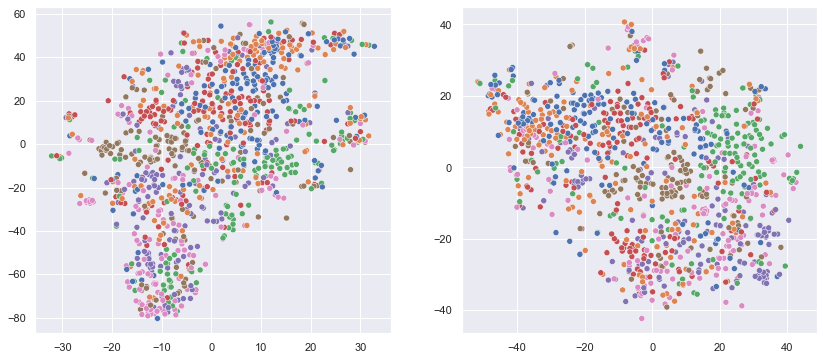

In [25]:
# For presentation purpose 

aris_I_n = []
aris_II_n = []
aris_I_un = []
aris_II_un = []

warnings.filterwarnings('ignore')

sns.set(rc = {'figure.figsize':(14,6)}, font_scale = 1)
fig, ax = plt.subplots(1, 2)

i = 4

# isolate problematic ones
shitty_ones_n = np.array([x is None for x in bof_n[i]])
shitty_ones_un = np.array([x is None for x in bof_un[i]])

# filter bof array
tn = [ x for (k, x) in enumerate(bof_n[i])  if not shitty_ones_n[k] ]
tun = [ x for (k, x) in enumerate(bof_un[i])  if not shitty_ones_un[k] ]

bof_labels_I_n = dt_img['primary_cat'][:n_imgs][~ shitty_ones_n]
bof_labels_II_n = dt_img['secondary_cat'][:n_imgs][~ shitty_ones_n]
bof_array_n = np.stack(tn)

bof_labels_I_un = dt_img['primary_cat'][:n_imgs][~ shitty_ones_un]
bof_labels_II_un = dt_img['secondary_cat'][:n_imgs][~ shitty_ones_un]
bof_array_un = np.stack(tun)

# Dimensions réduction
# pca = decomposition.PCA(0.98)
# bof_pca = pca.fit_transform(bof_array_n)
bof_pca = bof_array_n

tsne_bof = manifold.TSNE(n_components=2, perplexity=30, init='random', n_iter = 2000)
bof_array_n = tsne_bof.fit_transform(bof_pca)

sns.scatterplot(bof_array_n[:,0], bof_array_n[:,1], hue = bof_labels_I_n, ax = ax[0], legend = False)


#     pca = decomposition.PCA(0.98)
#     bof_pca = pca.fit_transform(bof_array_un)
bof_pca = bof_array_un

tsne_bof = manifold.TSNE(n_components=2, perplexity=30, init='random', n_iter = 2000)
bof_array_un = tsne_bof.fit_transform(bof_pca)

sns.scatterplot(bof_array_un[:,0], bof_array_un[:,1], hue = bof_labels_I_un, ax = ax[1], legend = False)


n_cat_I = len(set(bof_labels_I_n))
models_ = cluster.KMeans(init="k-means++", n_clusters = n_cat_I)
preds_I = models_.fit_predict(bof_array_n)
aris_I_n.append(metrics.adjusted_rand_score(preds_I, bof_labels_I_n))

n_cat_II = len(set(bof_labels_II_n))
models_ = cluster.KMeans(init="k-means++", n_clusters = n_cat_II)
preds_II = models_.fit_predict(bof_array_n)
aris_II_n.append(metrics.adjusted_rand_score(preds_II, bof_labels_II_n))


n_cat_I = len(set(bof_labels_I_un))
models_ = cluster.KMeans(init="k-means++", n_clusters = n_cat_I)
preds_I = models_.fit_predict(bof_array_un)
aris_I_un.append(metrics.adjusted_rand_score(preds_I, bof_labels_I_un))

n_cat_II = len(set(bof_labels_II_un))
models_ = cluster.KMeans(init="k-means++", n_clusters = n_cat_II)
preds_II = models_.fit_predict(bof_array_un)
aris_II_un.append(metrics.adjusted_rand_score(preds_II, bof_labels_II_un))


warnings.filterwarnings('default')

print("Aris : \nPrimary cat. : w/ norm : {}, w/o norm : {}\nSecondary cat. : w/ norm : {}, w/o norm : {}".format(aris_I_n[0], aris_I_un[0],
                                                                                                                 aris_II_n[0], aris_II_un[0]))

### NOTE : increase n cluster improves ARI 

## CNN - VGG16

In [ ]:
from tensorflow.keras.utils import load_img
from keras.layers import Flatten
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model
import numpy as np

# load model
model = VGG16()
model.summary()
# remove the output layer (only)
model_1 = Model(inputs=model.inputs, outputs=model.layers[-2].output)
model_1.summary()

# remove top block (3x dense layers)
model_2 = Model(inputs=model.inputs, outputs=model.layers[-4].output)
model_2.summary()




In [25]:
from numba import cuda
cuda.select_device(0)
cuda.close()

In [27]:
def read_img(paths, w, h):
    ts = np.empty( (len(paths),  h, w, 3) )
    for p in range(len(paths)):
        ts[p,:,:,:] = load_img(paths[p], target_size = (h, w))
    
    return ts
    
paths = list(dt_img['image'].apply(lambda x : './data/Flipkart/Images/{}'.format(x)))

# Read image, redimension & preprocessing
ar = read_img(paths, 224, 224)
ar = preprocess_input(ar)

C:\Users\max\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [28]:
preds = []
preds.append(model_1.predict(ar))
preds.append(model_2.predict(ar))

33/33 [==============================] - 3s 92ms/step


In [32]:
from sklearn.manifold import TSNE

ppx = [60, 250]

n_cat_I = len(set(dt_img['primary_cat']))
tsne = []
km = []
for k, p in enumerate(preds):
    tsne.append(TSNE(perplexity=ppx[k], init='random', n_iter = 2000).fit_transform(p))
    km.append(cluster.KMeans(init="k-means++", n_clusters = n_cat_I))
    km[-1].fit(tsne[-1])


C:\Users\max\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\max\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\max\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\max\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


ARI (m1): 0.5267814115616168
ARI (m2): 0.28509482920208573


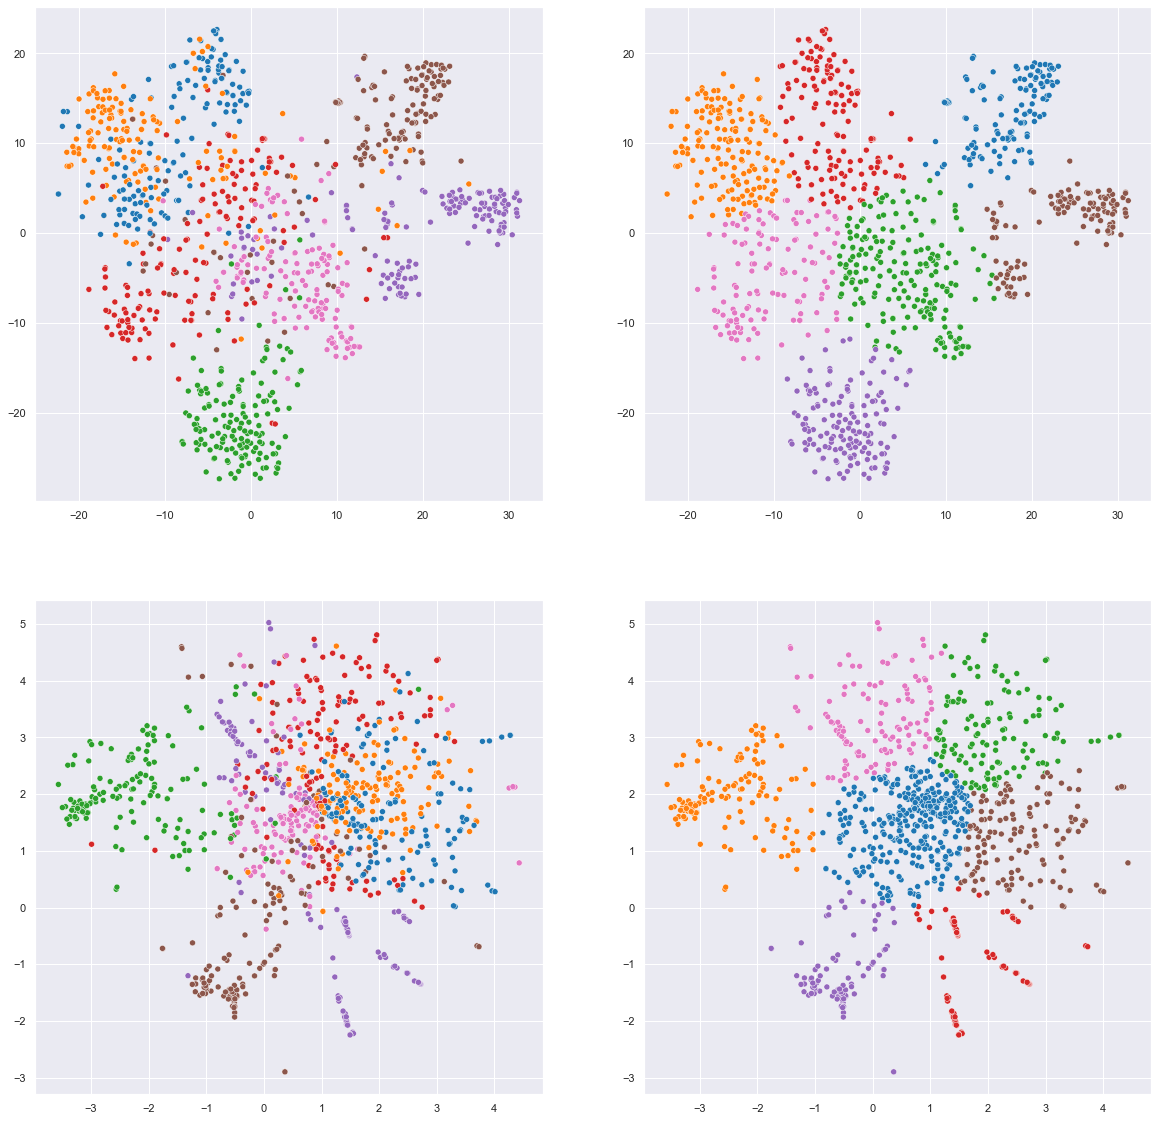

In [35]:
sns.set(rc = {'figure.figsize':(20, 20)}, font_scale = 1)
fig, ax = plt.subplots(2, 2)

for k, p in enumerate(preds):
    sns.scatterplot(x=tsne[k][:,0], y=tsne[k][:,1], hue = dt['primary_cat'], palette = sns.color_palette("tab10")[:7], ax = ax[k, 0], legend = False)
    sns.scatterplot(x=tsne[k][:,0], y=tsne[k][:,1], hue = km[k].labels_, palette = sns.color_palette("tab10")[:7], ax = ax[k, 1], legend = False)

print('ARI (m1): {}'.format(metrics.adjusted_rand_score(km[0].labels_, dt_img['primary_cat'])))
print('ARI (m2): {}'.format(metrics.adjusted_rand_score(km[1].labels_, dt_img['primary_cat'])))

Pour CNN :
    https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/